In [1]:
import pandas as pd
import numpy as np
from data_visualisation import *
import datetime as dt
from pathlib import Path

In [235]:
%reset Out

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Flushing output cache (0 entries)


In [237]:
def topup_st_dct(dct, series):
    for st in series.Station.unique():
        if st in dct:
            dct[st] += 1
        else:
            dct[st] = 1

In [238]:
def demean_two_srs(sr1, sr2, drop_cols):
    sr1['Time'] = sr1.Timestamp.dt.time
    sr2['Time'] = sr2.Timestamp.dt.time
    dct = dict()
    topup_st_dct(dct, sr1)
    topup_st_dct(dct, sr2)
    gb = sr1.drop(drop_cols, axis=1).append(sr2.drop(drop_cols, axis=1))
#     gb['Time'] = gb.Timestamp.dt.time
    gb = gb.groupby(by=['Station', 'Time']).aggregate(np.mean).reset_index()
    return gb,dct

In [239]:
def topup_corpus(gb, sr2, dct, drop_cols):
#     sr1['Time'] = sr1.Timestamp.dt.time
    sr2['Time'] = sr2.Timestamp.dt.time
    topup_st_dct(dct, sr2)
    gb = gb.append(sr2.drop(drop_cols, axis=1))
#     gb['Time'] = gb.Timestamp.dt.time
    gb = gb.groupby(by=['Station', 'Time']).aggregate(np.mean).reset_index()
    return gb, dct

In [240]:
def create_corpus(path, day_of_week):
    drop_cols = ['Timestamp','Freeway', 'District', 'Direction of Travel', 'Lane Type', 'Station Length', '% Observed', 'Total Flow', 'Avg Occupancy']
    pth = Path(path)
    fst = False
    sec = False
    US_holidays_2017 = pd.read_csv('/home/frolovconst/Dvlpt/prj/Python/tc_w_ml/data/PeMS/Series/Batch/light/US_holidays_2017.csv', parse_dates=['Date'])
    for child in pth.iterdir():
        sr1 = pd.read_csv(path + child.name, parse_dates=[0])
        if sr1.Timestamp.dt.dayofyear[0] in a.Date.dt.dayofyear.as_matrix():
            print(child.name + ' is a holiday')
            continue
        if sr1.Timestamp.dt.dayofweek[0] == day_of_week:
            print(child.name)
            if sec == True:
                gb, dct = topup_corpus(gb, sr1, dct, drop_cols)
            elif fst==True:
                gb, dct = demean_two_srs(sr1, sr2, drop_cols)
                sec = True
            else:
                sr2 = sr1
                fst=True
    return gb, dct
        
            

In [241]:
def topup_grand(corpus, dct, path, day_of_week):
    drop_cols = ['Timestamp','Freeway', 'District', 'Direction of Travel', 'Lane Type', 'Station Length', '% Observed', 'Total Flow', 'Avg Occupancy']
    pth = Path(path)
    US_holidays_2017 = pd.read_csv('/home/frolovconst/Dvlpt/prj/Python/tc_w_ml/data/PeMS/Series/Batch/light/US_holidays_2017.csv', parse_dates=['Date'])
    for child in pth.iterdir():
        sr1 = pd.read_csv(path + child.name, parse_dates=[0])
        if sr1.Timestamp.dt.dayofyear[0] in a.Date.dt.dayofyear.as_matrix():
            print(child.name + ' is a holiday')
            continue
        if sr1.Timestamp.dt.dayofweek[0] == day_of_week:
            print(child.name)
            gb, dct = topup_corpus(corpus, sr1, dct, drop_cols)
    return gb, dct

In [202]:
gb_mon, dct_mon = create_corpus('/home/frolovconst/Dvlpt/prj/Python/tc_w_ml/data/PeMS/Series/Batch/light/Jan/smoothed/', 0)

d07_text_station_5min_2017_01_02.tx.csv is a holiday
d07_text_station_5min_2017_01_09.tx.csv
d07_text_station_5min_2017_01_23.tx.csv
d07_text_station_5min_2017_01_16.tx.csv is a holiday
d07_text_station_5min_2017_01_30.tx.csv


In [203]:
gb_mon, dct_mon = topup_grand(gb_mon, dct_mon, '/home/frolovconst/Dvlpt/prj/Python/tc_w_ml/data/PeMS/Series/Batch/light/Feb/smoothed/', 0)

d07_text_station_5min_2017_02_06.tx.csv
d07_text_station_5min_2017_02_27.tx.csv
d07_text_station_5min_2017_02_20.tx.csv is a holiday
d07_text_station_5min_2017_02_13.tx.csv


In [204]:
gb_mon, dct_mon = topup_grand(gb_mon, dct_mon, '/home/frolovconst/Dvlpt/prj/Python/tc_w_ml/data/PeMS/Series/Batch/light/Mar/smoothed/', 0)

d07_text_station_5min_2017_03_13.tx.csv
d07_text_station_5min_2017_03_27.tx.csv
d07_text_station_5min_2017_03_06.tx.csv
d07_text_station_5min_2017_03_20.tx.csv


In [205]:
gb_mon, dct_mon = topup_grand(gb_mon, dct_mon, '/home/frolovconst/Dvlpt/prj/Python/tc_w_ml/data/PeMS/Series/Batch/light/Apr/smoothed/', 0)

d07_text_station_5min_2017_04_10.tx.csv
d07_text_station_5min_2017_04_17.tx.csv
d07_text_station_5min_2017_04_03.tx.csv
d07_text_station_5min_2017_04_24.tx.csv


In [220]:
gb_mon.to_csv('/home/frolovconst/Dvlpt/prj/Python/tc_w_ml/data/PeMS/Series/Batch/monays_till_apr.csv', index=False, header=['Station', 'Time', 'Avg Speed', 'Samples'])

In [242]:
dct = pd.DataFrame({'Station' : list(dct_mon.keys()),
                   'count': list(dct_mon.values())})

NameError: name 'pd' is not defined

In [221]:
dct.to_csv('/home/frolovconst/Dvlpt/prj/Python/tc_w_ml/data/PeMS/Series/Batch/monays_till_apr_dct.csv', index=False, header=['Station', 'count'])

In [230]:
gb = pd.read_csv('/home/frolovconst/Dvlpt/prj/Python/tc_w_ml/data/PeMS/Series/Batch/monays_till_apr.csv', parse_dates=['Time'])

In [232]:
gb['Time'] = gb.Time.dt.time

In [229]:
gb_mon.tail()

,Station,Time,Avg Speed,Samples
732999,775795,23:35:00,62.6,20.0
733000,775795,23:40:00,62.6,20.0
733001,775795,23:45:00,62.6,20.0
733002,775795,23:50:00,62.6,20.0
733003,775795,23:55:00,62.6,20.0


In [233]:
gb.tail()

,Station,Time,Avg Speed,Samples
732999,775795,23:35:00,62.6,20.0
733000,775795,23:40:00,62.6,20.0
733001,775795,23:45:00,62.6,20.0
733002,775795,23:50:00,62.6,20.0
733003,775795,23:55:00,62.6,20.0


In [192]:
a = pd.Series(US_holidays_2017)

In [193]:
a.to_csv('/home/frolovconst/Dvlpt/prj/Python/tc_w_ml/data/PeMS/Series/Batch/light/US_holidays_2017.csv', index=False, header=['Date'])

In [194]:
a = pd.read_csv('/home/frolovconst/Dvlpt/prj/Python/tc_w_ml/data/PeMS/Series/Batch/light/US_holidays_2017.csv', parse_dates=['Date'])

In [195]:
d1.Timestamp.dt.date[0] in a.Date.dt.date.as_matrix()

False

In [196]:
d1.Timestamp.dt.date[0] in US_holidays_2017

False

In [197]:
d1.Timestamp.dt.dayofyear[0]

3

In [198]:
type(a.Date.dt.date[0])

datetime.date

In [200]:
d1.Timestamp.dt.date[0]

datetime.date(2017, 1, 3)

In [201]:
a.Date.dt.dayofweek

0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    4
8    3
9    0
Name: Date, dtype: int64

In [52]:
np.isin(d1.Timestamp.dt.date[0], a)

array(False, dtype=bool)

In [34]:
d1.Timestamp.dt.date[0]

datetime.date(2017, 1, 3)

In [23]:
count=0
for v in dct_mon.values():
    if v==1:
        count += 1
print(count)

8


In [32]:
d1 = pd.read_csv('/home/frolovconst/Dvlpt/prj/Python/tc_w_ml/data/PeMS/Series/Batch/tlight/smoothed/d07_text_station_5min_2017_01_03.tx.csv', parse_dates=[0])

In [5]:
d2 = pd.read_csv('/home/frolovconst/Dvlpt/prj/Python/tc_w_ml/data/PeMS/Series/Batch/tlight/smoothed/d07_text_station_5min_2017_01_10.tx.csv', parse_dates=[0])
d3 = pd.read_csv('/home/frolovconst/Dvlpt/prj/Python/tc_w_ml/data/PeMS/Series/Batch/tlight/smoothed/d07_text_station_5min_2017_01_04.tx.csv', parse_dates=[0])

In [240]:
def plot_two_days_for_stations(flow_data, flow_data2, station_no, chrstc_to_plot = 'Avg Speed'):
    if not np.isin('Time', flow_data.columns):
        flow_data['Time'] = flow_data.Timestamp.dt.time
    if not np.isin('Time', flow_data2.columns):
        flow_data2['Time'] = flow_data2.Timestamp.dt.time
    ax = flow_data[flow_data.Station==station_no].plot(x='Time', y='Avg Speed', figsize=[15,10], label=flow_data.Timestamp.dt.day[0])
    flow_data2[flow_data2.Station==station_no].plot(x='Time', y='Avg Speed', ax=ax, label=flow_data2.Timestamp.dt.day[0])
    plt.show()


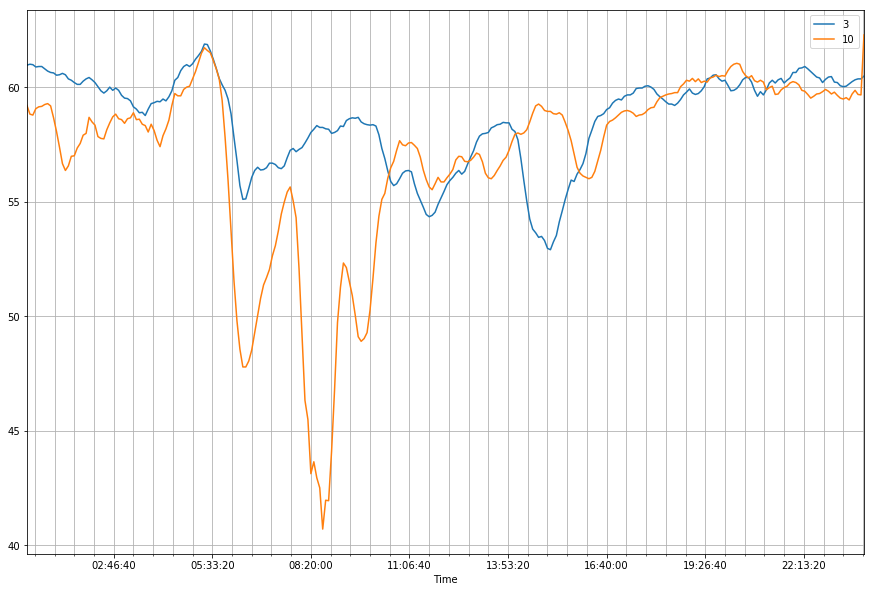

In [248]:
plot_two_days_for_stations(d1, d2, 715938)

In [5]:
apd = d1.append(d2)

In [242]:
d1.drop(, axis=1)

,Timestamp,Station,Samples,Avg Speed,Time
0,2017-01-03 00:20:00,715898,0,68.84,00:20:00
1,2017-01-03 00:20:00,715918,0,69.08,00:20:00
2,2017-01-03 00:20:00,715920,0,68.32,00:20:00
3,2017-01-03 00:20:00,715929,0,63.70,00:20:00
4,2017-01-03 00:20:00,715930,0,65.02,00:20:00
5,2017-01-03 00:20:00,715933,24,70.92,00:20:00
6,2017-01-03 00:20:00,715938,32,60.96,00:20:00
7,2017-01-03 00:20:00,715944,32,72.46,00:20:00
8,2017-01-03 00:20:00,715947,24,65.52,00:20:00
9,2017-01-03 00:20:00,715996,48,70.18,00:20:00


In [9]:
gb = apd.groupby(by=['Station', 'Hour', 'Min']).aggregate(np.mean)

In [10]:
test = gb.reset_index(drop=False)

In [15]:
dt1 = pd.read_csv('/home/frolovconst/Dvlpt/prj/Python/tc_w_ml/data/PeMS/Series/light/smoothed/d07_text_station_5min_2017_10_04.csv', parse_dates=[0])

In [3]:
stations_active = pd.read_csv('/home/frolovconst/Dvlpt/prj/Python/tc_w_ml/data/PeMS/Stations/light/d07_text_meta_2017_09_20_active.csv')

In [17]:
emp_st_actv = d1.Station.unique()

In [81]:
emp_st_actv = emp_st_actv[np.isin(emp_st_actv,d3.Station)]

In [16]:
dt1.Station.unique().shape

(2728,)

In [18]:
emp_st_actv.shape

(2508,)

In [24]:
emp_st_actv.shape

(2495,)

In [82]:
emp_st_actv.shape

(2485,)

In [25]:
d2.shape

(720792, 12)

In [26]:
d3.shape

(717668, 12)

In [24]:
d1.shape

(712272, 12)

In [27]:
d2.Station[d2.Station.isin(d1.Station.unique())].unique()

array([715898, 715918, 715920, ..., 775690, 775691, 775692])

In [21]:
test[(test.Station==716036) & (test.Samples!=0)]

,Station,Hour,Min,District,Freeway,Station Length,Samples,% Observed,Total Flow,Avg Occupancy,Avg Speed
5112,716036,0,20,7.0,10.0,0.38,38.0,80.0,172.0,0.03160,70.16
5113,716036,0,25,7.0,10.0,0.38,40.0,80.0,192.0,0.03630,69.77
5114,716036,0,30,7.0,10.0,0.38,40.0,80.0,201.0,0.03600,69.72
5115,716036,0,35,7.0,10.0,0.38,40.0,80.0,184.5,0.03395,69.46
5116,716036,0,40,7.0,10.0,0.38,40.0,80.0,170.5,0.03155,69.19
5117,716036,0,45,7.0,10.0,0.38,40.0,80.0,140.0,0.02500,69.15
5118,716036,0,50,7.0,10.0,0.38,40.0,80.0,145.0,0.02710,69.23
5119,716036,0,55,7.0,10.0,0.38,40.0,80.0,122.5,0.02205,69.25
5120,716036,1,0,7.0,10.0,0.38,38.0,80.0,133.0,0.02360,69.68
5121,716036,1,5,7.0,10.0,0.38,40.0,80.0,122.0,0.02245,70.04


In [12]:
d2[d2.Station==775692]

,Timestamp,Station,District,Freeway,Direction of Travel,Lane Type,Station Length,Samples,% Observed,Total Flow,Avg Occupancy,Avg Speed
2537,2017-01-10 00:20:00,775692,7,605,S,HV,1.055,0,0,28.0,0.0126,69.10
5075,2017-01-10 00:25:00,775692,7,605,S,HV,1.055,0,0,27.0,0.0127,69.00
7613,2017-01-10 00:30:00,775692,7,605,S,HV,1.055,0,0,26.0,0.0126,69.00
10151,2017-01-10 00:35:00,775692,7,605,S,HV,1.055,0,0,24.0,0.0122,69.00
12689,2017-01-10 00:40:00,775692,7,605,S,HV,1.055,0,0,24.0,0.0120,69.00
15227,2017-01-10 00:45:00,775692,7,605,S,HV,1.055,0,0,23.0,0.0108,69.00
17765,2017-01-10 00:50:00,775692,7,605,S,HV,1.055,0,0,22.0,0.0110,69.00
20303,2017-01-10 00:55:00,775692,7,605,S,HV,1.055,0,0,21.0,0.0105,69.00
22841,2017-01-10 01:00:00,775692,7,605,S,HV,1.055,0,0,19.0,0.0101,69.00
25379,2017-01-10 01:05:00,775692,7,605,S,HV,1.055,0,0,20.0,0.0101,69.00


In [37]:
d1[d1.Station==775692]

,Timestamp,Station,District,Freeway,Direction of Travel,Lane Type,Station Length,Samples,% Observed,Total Flow,Avg Occupancy,Avg Speed
2507,2017-01-03 00:20:00,775692,7,605,S,HV,1.055,0,0,1.0,0.0011,65.16
5015,2017-01-03 00:25:00,775692,7,605,S,HV,1.055,0,0,0.0,0.0000,65.16
7523,2017-01-03 00:30:00,775692,7,605,S,HV,1.055,0,0,0.0,0.0000,65.16
10031,2017-01-03 00:35:00,775692,7,605,S,HV,1.055,0,0,2.0,0.0012,65.10
12539,2017-01-03 00:40:00,775692,7,605,S,HV,1.055,0,0,0.0,0.0000,65.04
15047,2017-01-03 00:45:00,775692,7,605,S,HV,1.055,0,0,0.0,0.0000,65.06
17555,2017-01-03 00:50:00,775692,7,605,S,HV,1.055,0,0,0.0,0.0000,65.08
20063,2017-01-03 00:55:00,775692,7,605,S,HV,1.055,0,0,0.0,0.0000,65.10
22571,2017-01-03 01:00:00,775692,7,605,S,HV,1.055,0,0,0.0,0.0000,65.10
25079,2017-01-03 01:05:00,775692,7,605,S,HV,1.055,0,0,1.0,0.0009,65.04


In [30]:
d1.Timestamp.dt.time

0         00:20:00
1         00:20:00
2         00:20:00
3         00:20:00
4         00:20:00
5         00:20:00
6         00:20:00
7         00:20:00
8         00:20:00
9         00:20:00
10        00:20:00
11        00:20:00
12        00:20:00
13        00:20:00
14        00:20:00
15        00:20:00
16        00:20:00
17        00:20:00
18        00:20:00
19        00:20:00
20        00:20:00
21        00:20:00
22        00:20:00
23        00:20:00
24        00:20:00
25        00:20:00
26        00:20:00
27        00:20:00
28        00:20:00
29        00:20:00
            ...   
712242    23:55:00
712243    23:55:00
712244    23:55:00
712245    23:55:00
712246    23:55:00
712247    23:55:00
712248    23:55:00
712249    23:55:00
712250    23:55:00
712251    23:55:00
712252    23:55:00
712253    23:55:00
712254    23:55:00
712255    23:55:00
712256    23:55:00
712257    23:55:00
712258    23:55:00
712259    23:55:00
712260    23:55:00
712261    23:55:00
712262    23:55:00
712263    23

In [22]:
def plot_station_flow(flow_data, station_no, chrstc_to_plot = 'Avg Speed'):
    hours = mdts.HourLocator()
    date = flow_data.Timestamp.iloc[0].day
    month = flow_data.Timestamp.iloc[0].month
    datemin = dt.datetime(year=2017, month=month, day=date, hour=0)
    datemax = dt.datetime(year=2017, month=month, day=date, hour=23)
#     data_srs_no_null = flow_data.dropna(subset=[chrstc_to_plot])
    dates = flow_data[ (flow_data['Station'] == station_no)]['Timestamp']
    speed = flow_data[(flow_data['Station'] == station_no)][chrstc_to_plot]
    fig,ax = plt.subplots(figsize=[15,10])
    fig.figsize = [15,10]
    plt.plot_date(dates, speed, fmt='-', tz='EST')
    ax.xaxis.set_major_locator(hours)
    fig.autofmt_xdate()
    ax.xaxis.set_major_formatter(mdts.DateFormatter('%H:%M'))
    ax.set_xlim(datemin, datemax)
    plt.grid()
    plt.show()

In [28]:
def plot_two_station_data_w_nearest_incds(flow_data, station_no1, station_no2, chrstc_to_plot = 'Avg Speed'):
    hours = mdts.HourLocator()
    date = flow_data.Timestamp.iloc[0].day
    month = flow_data.Timestamp.iloc[0].month
    datemin = dt.datetime(year=2017, month=month, day=date, hour=0)
    datemax = dt.datetime(year=2017, month=month, day=date, hour=23)
    # filter only data for one station and w/o nans
    data_srs_no_null_1 = flow_data[flow_data['Station'] == station_no1]
    data_srs_no_null_2 = flow_data[flow_data['Station'] == station_no2]
#     data_srs_no_null = data_srs_no_null.dropna(subset=[chrstc_to_plot])
    # station of interest coords
    # incidents closest to the station
    # x-values
    dates1 = data_srs_no_null_1['Timestamp']
    dates2 = data_srs_no_null_2['Timestamp']
    # y-values
    speed1 = data_srs_no_null_1[chrstc_to_plot]
    speed2 = data_srs_no_null_2[chrstc_to_plot]
    fig,ax = plt.subplots(figsize=[15,10])
    fig.figsize = [15,10]
    plt.plot_date(dates1, speed1, fmt='-', tz='EST')
    plt.plot_date(dates2, speed2, fmt='-', tz='EST', color='r')
    ax.xaxis.set_major_locator(hours)
    fig.autofmt_xdate()
    ax.xaxis.set_major_formatter(mdts.DateFormatter('%H:%M'))
    ax.set_xlim(datemin, datemax)
    plt.grid()
    plt.show()

In [82]:
d1[d1.Station==715898]

,Timestamp,Station,District,Freeway,Direction of Travel,Lane Type,Station Length,Samples,% Observed,Total Flow,Avg Occupancy,Avg Speed
0,2017-01-03 00:20:00,715898,7,5,S,ML,0.43,0,0,86.0,0.0126,68.84
2508,2017-01-03 00:25:00,715898,7,5,S,ML,0.43,0,0,83.0,0.0127,68.72
5016,2017-01-03 00:30:00,715898,7,5,S,ML,0.43,0,0,79.0,0.0126,68.66
7524,2017-01-03 00:35:00,715898,7,5,S,ML,0.43,0,0,75.0,0.0122,68.56
10032,2017-01-03 00:40:00,715898,7,5,S,ML,0.43,0,0,75.0,0.0120,68.46
12540,2017-01-03 00:45:00,715898,7,5,S,ML,0.43,0,0,72.0,0.0116,68.30
15048,2017-01-03 00:50:00,715898,7,5,S,ML,0.43,0,0,68.0,0.0110,68.24
17556,2017-01-03 00:55:00,715898,7,5,S,ML,0.43,0,0,64.0,0.0105,68.24
20064,2017-01-03 01:00:00,715898,7,5,S,ML,0.43,0,0,60.0,0.0101,68.26
22572,2017-01-03 01:05:00,715898,7,5,S,ML,0.43,0,0,60.0,0.0101,68.28


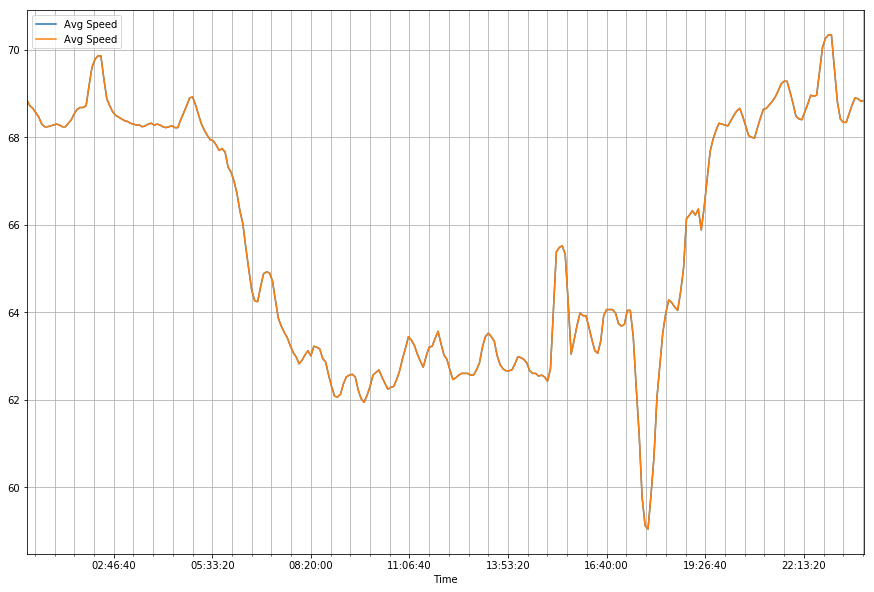

In [236]:
plot_two_days_for_stations(d1, d2, 715898)